In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
train_data = pd.read_csv('/sign_mnist_train.csv')
X_train = train_data.iloc[:, 1:].values.reshape(-1, 28, 28, 1) / 255.0  # Normalizing and reshaping
y_train = train_data.iloc[:, 0].values

# One-hot encoding
y_train = to_categorical(y_train, num_classes=26)

# Spliting
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [3]:
model = Sequential()
# First Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
model.add(Flatten())

# Fully Connected (Dense) Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.28))

# Output Layer
model.add(Dense(26, activation='softmax'))




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
  history = model.fit(X_train, y_train,
                      epochs=20,
                      batch_size=64,
                      validation_data=(X_val, y_val))



Epoch 1/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.2813 - loss: 2.4307 - val_accuracy: 0.8738 - val_loss: 0.4906
Epoch 2/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 26s 76ms/step - accuracy: 0.8193 - loss: 0.5596 - val_accuracy: 0.9676 - val_loss: 0.1524
Epoch 3/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 42s 79ms/step - accuracy: 0.9257 - loss: 0.2380 - val_accuracy: 0.9929 - val_loss: 0.0523
Epoch 4/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 40s 77ms/step - accuracy: 0.9648 - loss: 0.1227 - val_accuracy: 0.9984 - val_loss: 0.0248
Epoch 5/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 28s 81ms/step - accuracy: 0.9756 - loss: 0.0866 - val_accuracy: 0.9976 - val_loss: 0.0132
Epoch 6/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 40s 78ms/step - accuracy: 0.9838 - loss: 0.0571 - val_accuracy: 0.9996 - val_loss: 0.0068
Epoch 7/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 39s 74ms/step - accuracy: 0.9859 - loss: 0.0478 - val_accuracy: 0.9996 - val_loss: 0.0047
Epoch 8/20
344/344 ━━━━━━━━━━━━━━━━━━━━ 38s 65ms/step - accuracy: 0.9910 - loss: 0.0334 - 

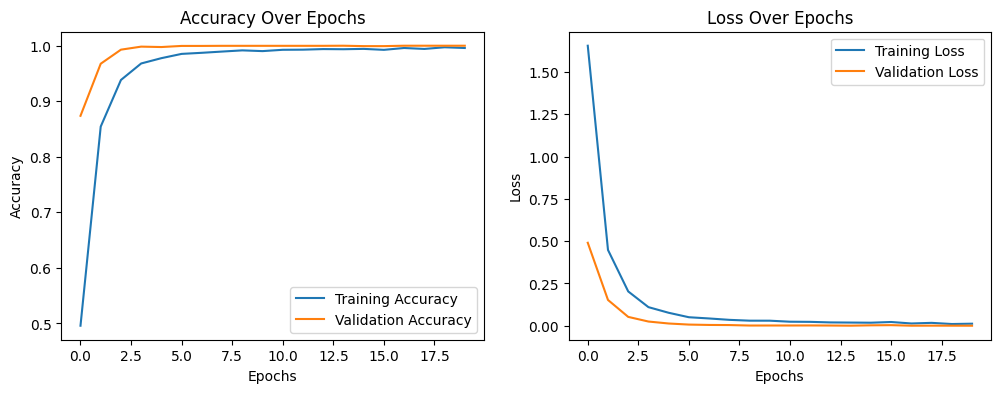

In [6]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()


In [7]:
model.save('/HandSignRecog.h5')

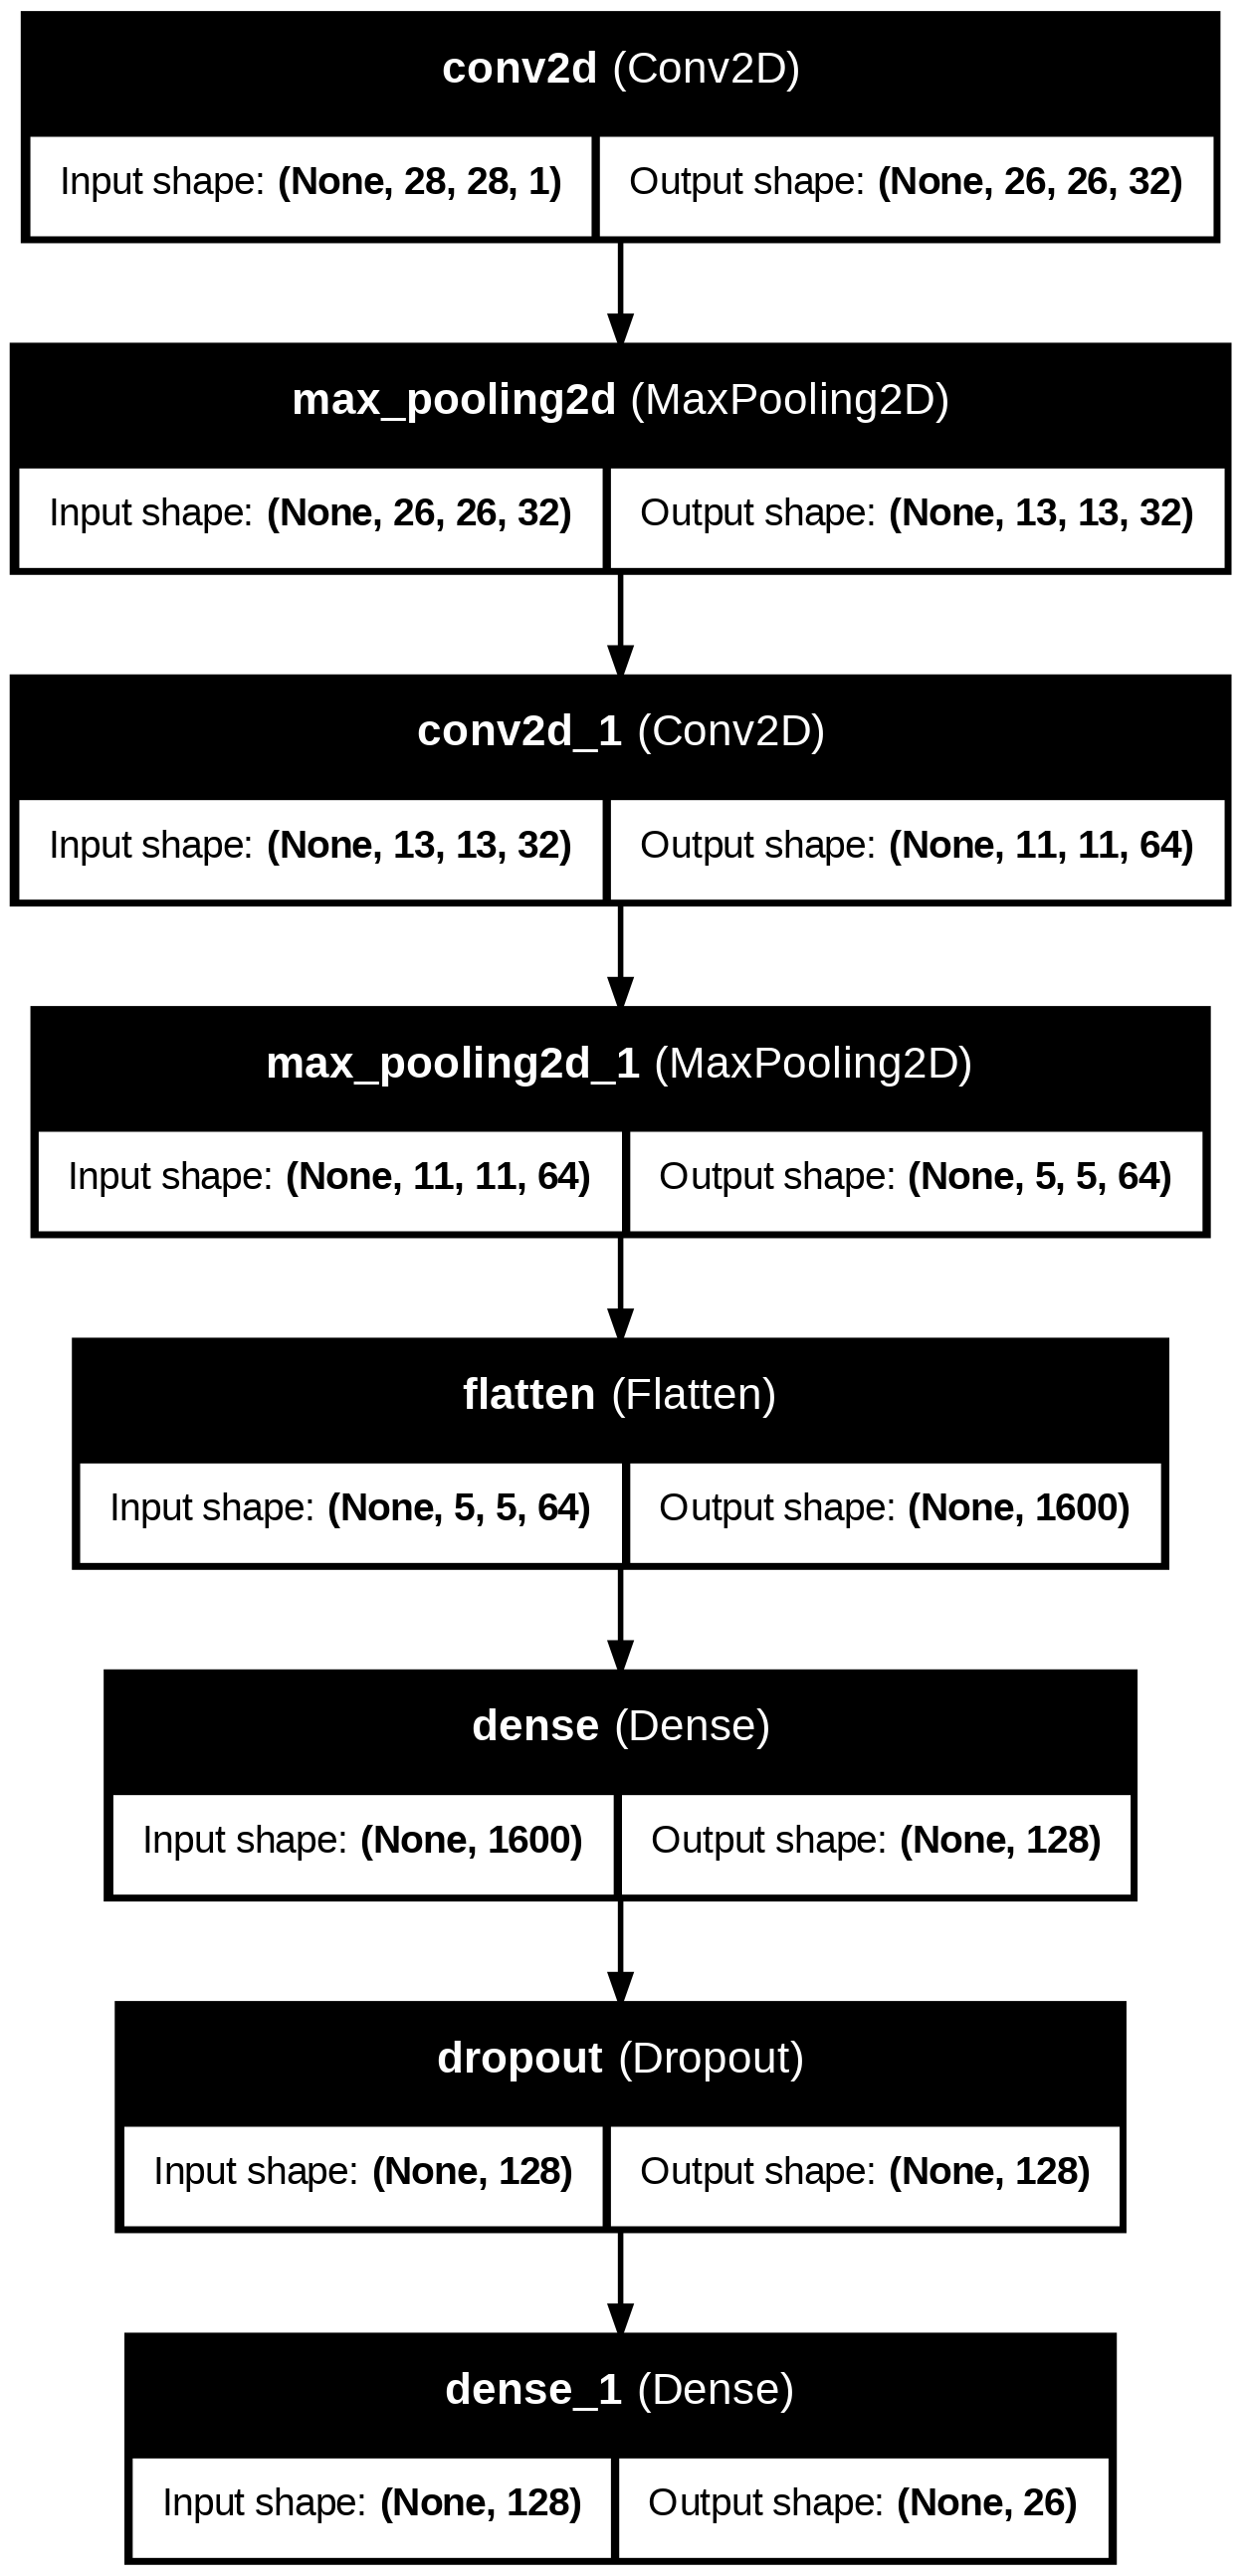

In [10]:
from tensorflow.keras.utils import plot_model

# Save a visual representation of the model architecture to a file
plot_model(
    model,
    to_file='/model_architecture.png',
    show_shapes=True,  # Displays the shape of the input and output tensors
    show_layer_names=True  # Displays the names of the layers
)



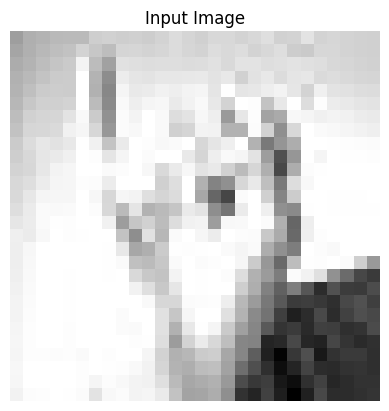

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Class: I (Label: 8)


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
model = load_model('/HandSignRecog.h5')

def preprocess_image(image_path):

    # Loading the image
    img = load_img(image_path, color_mode='grayscale', target_size=(28, 28))

    # Converting image to a numpy array
    img_array = img_to_array(img)

    # Normalizing
    img_array = img_array / 255.0

    # Reshaping to match the input shape of the CNN model
    img_array = np.reshape(img_array, (1, 28, 28, 1))

    return img_array

def predict_image(model, image_path, class_labels):

    # Preprocess function
    img_array = preprocess_image(image_path)

    # Displaying the input image
    plt.imshow(img_array[0].reshape(28, 28), cmap='gray')
    plt.title("Input Image")
    plt.axis('off')
    plt.show()

    # Make predictions
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    print(f"Predicted Class: {class_labels[predicted_class]} (Label: {predicted_class})")

# Define class labels for the sign language letters (A-Z, excluding J and Z as per the dataset)
class_labels = [chr(i) for i in range(65, 91)]  # ASCII values for A-Z
class_labels.remove('J')  # Remove J
class_labels.remove('Z')  # Remove Z

# Testing the model
image_path = '/237_I.jpg'  # custom image of a hand sign used ( can use any image of choice )
predict_image(model, image_path, class_labels)
